# Machine Learning Exercise 1 - Linear Regression

Programming exercise for Andrew Ng's Machine Learning Class on Coursera written in python 3.4.

## Linear Regression with One Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load restaurant data for profits and populations from the cities.
# root path under Andrew Coursera/machine-learning-ex1 folder
df = pd.read_csv('./ex1/ex1data1.txt', header=None, names=['Population', 'Profit'])

In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plotting the data

(4, 24)

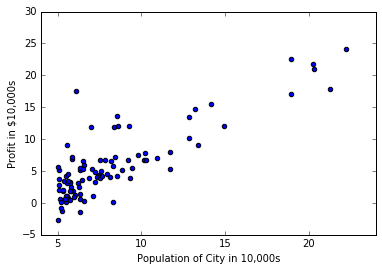

In [5]:
plt.scatter(df.Population, df.Profit)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4, 24)

### Gradient Descent

In [6]:
# setup arrays from data
m = len(df)
data = np.array(df.Population).reshape(m, 1)

# add an arrays of 1's to accommodate theta0 term
X = np.hstack((np.ones((m, 1)), data))

# need to reshape y to match with the shape of X.dot(theta)
y = np.array(df.Profit).reshape(m, 1)

# initialize theta and alpha
theta = np.zeros((2, 1))
alpha = 0.01
iterations = 1500

In [7]:
# Compute cost function J(theta)
def computeCost(X, y, theta):
    return np.sum((X.dot(theta) - y)**2) / (2 * len(X))

In [8]:
# Run
computeCost(X, y, theta)

32.072733877455676

In [9]:
# calculate gradient descent and cost function for each iteration
def gradientDescent(X, y, theta, alpha, iterations):
    J = computeCost(X, y, theta)
    J_list = []
    for i in range(iterations):
        theta = theta - (alpha/len(X)) * (np.dot(X.T, (X.dot(theta) - y)))
        cost = computeCost(X, y, theta)
        if cost > J:
            print('Cost function does not converge.')
            return
        else:
            J = cost
            J_list.append(cost)
        
    return theta, cost, J_list

In [10]:
theta, cost, J_list = gradientDescent(X, y, theta, alpha, iterations)
theta, cost

(array([[-3.63029144],
        [ 1.16636235]]), 4.4833882565877259)

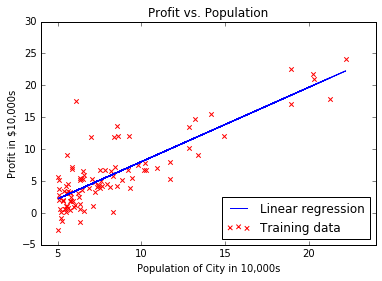

In [11]:
# plotting the training data and linear regression line. 
# both scatter and line plots can use 'label' to define legend name.
plt.scatter(df.Population, df.Profit, c='r', marker='x', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4, 24)
plt.title('Profit vs. Population')
plt.plot(X[:, 1], X.dot(theta)[:, 0], 'b-', label='Linear regression')
plt.legend(loc=4)

### Visualizing J(theta)

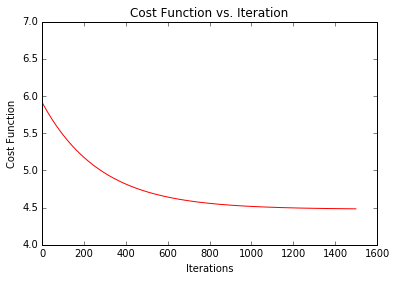

In [12]:
plt.plot(range(iterations), J_list, 'r')
plt.ylim(4.0, 7.0)
plt.title('Cost Function vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

### Solve by sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = df.Population.values.reshape(-1, 1)
y = df.Profit.values.reshape(-1, 1)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


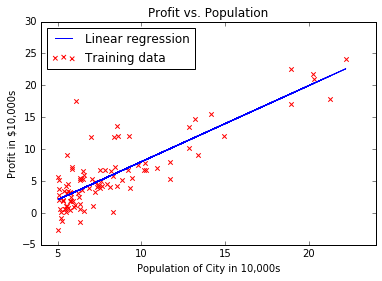

In [15]:
model = LinearRegression()
model.fit(X, y)
predict = model.predict(X)
plt.scatter(X, y, c='r', marker='x', label='Training data')
plt.plot(X, predict, 'b-', label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4, 24)
plt.title('Profit vs. Population')
plt.legend(loc='best')

In [16]:
model.intercept_, model.coef_

(array([-3.89578088]), array([[ 1.19303364]]))

In [17]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [18]:
model.score(X, y)

0.70203155378413973

## Linear Regression with Multiple Variables

In [19]:
import pandas as pd
import numpy as np

In [20]:
df2 = pd.read_csv('./ex1/ex1data2.txt', header=None, names=['size in sq ft','num of bedrooms', 'price'])
df2.head()

,size in sq ft,num of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
def featureNormalize(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)

### Gradient Descent

In [22]:
# setup features and targets
features = featureNormalize(df2.iloc[:, :-1])
features.insert(0, 'x0', 1)
target = df2.price.values.reshape(-1, 1)
features[:5]

,x0,size in sq ft,num of bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [23]:
# calculate cost function for each iteration
thetaMulti = np.zeros((len(features.columns), 1))
thetaMulti, cost, J_list = gradientDescent(features.values, target, thetaMulti, alpha, iterations)

### Visualizing J(theta)

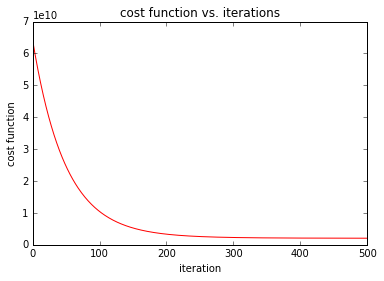

In [24]:
plt.plot(range(iterations), J_list, 'r')
plt.xlim(0, 500)
plt.title('cost function vs. iterations')
plt.xlabel('iteration')
plt.ylabel('cost function')

## Solve by scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [26]:
# normalize features to the same order of magnitude
norm_features = StandardScaler().fit_transform(df2.iloc[:, :-1])

# fitting the model
modelMulti = LinearRegression()
modelMulti.fit(norm_features, df2.price)
modelMulti.intercept_, modelMulti.coef_

(340412.6595744681, array([ 109447.79646964,   -6578.35485416]))

In [27]:
thetaMulti

array([[ 340412.56301439],
       [ 110540.56654627],
       [  -6558.99054811]])

In [28]:
modelMulti.score(featureNormalize(df2.iloc[:, :-1]), df2.price)

0.73286117380504268

In [29]:
norm_features[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

In [34]:
# try to fit the model without scaling features
test = LinearRegression()
test.fit(df2.iloc[:, :-1], df2.price)
test.intercept_, test.coef_

(89597.909542797483, array([  139.21067402, -8738.01911233]))

In [33]:
test.score(df2.iloc[:, :-1], df2.price)

0.73294501802891432